In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import load_img
from keras.utils import img_to_array
import keras_hub

## Load our prepared Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp '/content/drive/MyDrive/fine_tuning.keras' '/content'

In [5]:
model = load_model('fine_tuning.keras')
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ image_converter                 │ (None, 180, 180, 3)    │             0 │
│ (ImageConverter)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception_backbone               │ (None, 6, 6, 2048)     │    20,861,480 │
│ (XceptionBackbone)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,868,989 (239.83 MB)

 Trainable params: 20,938,153 (79.87 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 41,876,308 (159.75 MB)

## Load some test images

In [43]:
from google.colab import files
uploaded = files.upload()  # Capture the returned dictionary
filenames = list(uploaded.keys())  # Get the list of uploaded filenames

print("Uploaded files:", filenames)

Saving face_mask_1.jpg to face_mask_1.jpg
Uploaded files: ['face_mask_1.jpg']


In [44]:
img_path = filenames[0]
img = load_img(img_path, target_size=(180, 180))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

In [22]:
x.shape

(1, 180, 180, 3)

In [45]:
pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step


In [46]:
pred

array([[0.767352]], dtype=float32)

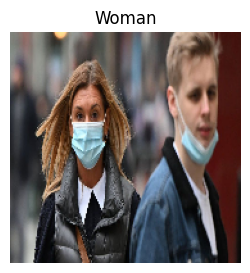

In [47]:
title = 'Man' if pred[0][0] < 0.5 else 'Woman'
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.title(title)
plt.axis('off')
plt.show()